In [1]:
#importing libraries required for data processing
import pandas as pd
import numpy as np

In [2]:
#Importing path and reading csv file
path=r"C:\Users\Sonal\Downloads\auto-mpg  - auto-mpg.csv"
data=pd.read_csv(path)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,1,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,1,ford torino,JEETMEET


In [3]:
data.drop(['origin'],axis=1,inplace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET


In [4]:
#finding data types of dataset provided
data.dtypes

mpg               int64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year      float64
car name         object
CAR Number       object
dtype: object

# DATA CLEANING

In [5]:
#checking null values sum 
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    2
model year      2
car name        0
CAR Number      7
dtype: int64

In [6]:
#Let's check the other values in that row
data[data['acceleration'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
21,24,4,107.0,90,2430,NaN,70.0,audi 100 ls,JH5673R
53,31,4,71.0,65,1773,NaN,71.0,toyota corolla 1200,T568G4


In [7]:
# Calculating mean for 'acceleration' and replacing missing value
avg_acceleration=round(data["acceleration"].mean(),1)

print(avg_acceleration)
data["acceleration"]=data["acceleration"].replace(np.nan,avg_acceleration)

14.0


In [8]:
# Calculating mode of 'model year' and replacing missing value
data["model year"]=data["model year"].fillna(data["model year"].mode())

In [9]:
#Check
data.iloc[[21,53]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
21,24,4,107.0,90,2430,14.0,70.0,audi 100 ls,JH5673R
53,31,4,71.0,65,1773,14.0,71.0,toyota corolla 1200,T568G4


In [10]:
#Find and remove duplicate entries

#data[data['CAR Number'].duplicated()]  OR 

data[data.duplicated(subset=['CAR Number'])]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
17,15,8,383.0,170,3563,10.0,70.0,dodge challenger se,TN5678
26,10,8,307.0,200,4376,15.0,70.0,chevy c20,NaN
29,27,4,97.0,88,2130,14.5,71.0,datsun pl510,NaN
32,25,4,98.0,80,2046,19.0,71.0,ford pinto,NaN
34,16,6,225.0,105,3439,15.5,71.0,plymouth satellite custom,JHGY59
52,30,4,88.0,76,2065,14.5,71.0,fiat 124b,NaN
54,35,4,72.0,69,1613,18.0,71.0,datsun 1200,NaN
73,13,8,307.0,130,4098,14.0,72.0,chevrolet chevelle concours (sw),NaN


In [11]:
#~data['CAR Number'].duplicated(keep='first')
data['CAR Number'].drop_duplicates(keep='first',inplace=True)


In [12]:
#Display the first five and last five rows
data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET


In [13]:
data.tail(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
93,14,8,318.0,150,4237,14.5,73.0,plymouth fury gran sedan,FGTEE4
94,13,8,440.0,215,4735,11.0,73.0,chrysler new yorker brougham,GTTYR6
95,12,8,455.0,225,4951,11.0,73.0,buick electra 225 custom,TTGGT53
96,13,8,360.0,175,3821,11.0,73.0,amc ambassador brougham,TGTYY67
97,18,6,225.0,105,3121,16.5,73.0,plymouth valiant,HUYT76


In [14]:
#Display the concise summary of your dataset
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,96.000000
mean,18.397959,6.316327,254.423469,131.020408,3342.22449,14.045918,71.260417
std,5.872775,1.869985,124.791731,47.787109,973.39107,2.991471,1.038671
min,9.000000,3.000000,70.000000,46.000000,1613.00000,8.000000,70.000000
25%,14.000000,4.000000,120.000000,90.000000,2372.75000,12.000000,70.000000
50%,17.000000,8.000000,302.000000,133.500000,3437.50000,14.000000,71.000000
75%,23.000000,8.000000,350.750000,165.000000,4230.00000,15.500000,72.000000
max,35.000000,8.000000,455.000000,225.000000,5140.00000,23.500000,73.000000


In [15]:
#Display all the column names in the dataset
print(data.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'car name', 'CAR Number'],
      dtype='object')


In [16]:
#Display the name of the car with maximum number of horsepower.
max_horespower_carname = data[['car name','horsepower']][data.horsepower==data['horsepower'].max()]
max_horespower_carname

,car name,horsepower
8,pontiac catalina,225
13,buick estate wagon (sw),225
95,buick electra 225 custom,225


# In our dataset, the fuel consumption column is "mpg" and is represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts fuel consumption with the L/100km standard. change the name of the column to "L/100km". 


In [17]:
#Rename the column
data.rename(columns = {"mpg":"L/100km"},inplace =True)
data

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET
...,...,...,...,...,...,...,...,...,...
93,14,8,318.0,150,4237,14.5,73.0,plymouth fury gran sedan,FGTEE4
94,13,8,440.0,215,4735,11.0,73.0,chrysler new yorker brougham,GTTYR6
95,12,8,455.0,225,4951,11.0,73.0,buick electra 225 custom,TTGGT53
96,13,8,360.0,175,3821,11.0,73.0,amc ambassador brougham,TGTYY67


# Normalize the column “Weight” so that the values range from 0 to 1 


# Approach: replace original value by (original value)/(maximum value)


In [18]:
data['weight']=data['weight']/data['weight'].max()

In [19]:
data.head()

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,0.681712,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,0.718482,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,0.668482,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,0.667899,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,0.671012,10.5,70.0,ford torino,JEETMEET


# <!-- 
In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?
 -->

In [20]:
#convert to correct data type
data["horsepower"]=data["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

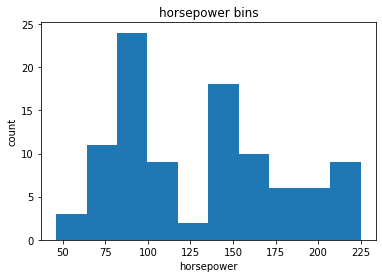

In [21]:
#plot the histogram
import matplotlib.pyplot as plt
plt.hist(data["horsepower"])

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [31]:
bins = np.linspace(min(data["horsepower"]), max(data["horsepower"]), 4)
bins

array([ 46.        , 105.66666667, 165.33333333, 225.        ])

In [32]:
group_names = ['Low', 'Medium', 'High']

In [33]:
data['horsepower-binned'] = pd.cut(data['horsepower'], bins, labels=group_names, include_lowest=True )
data[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,130,Medium
1,165,Medium
2,150,Medium
3,150,Medium
4,140,Medium
5,198,High
6,220,High
7,215,High
8,225,High
9,190,High


In [25]:
data["horsepower-binned"].value_counts()

Low       44
Medium    30
High      24
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

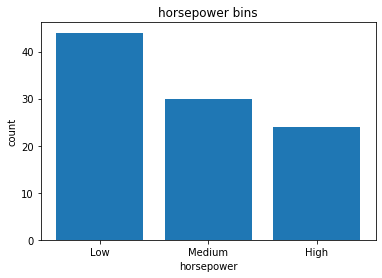

In [26]:
#plot the histogram
import matplotlib.pyplot as plt
plt.bar(group_names, data["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [27]:
#Detect outliers using Z-score and remove them

from scipy import stats

data['zscore']=stats.zscore(data["acceleration"])
#outlier=np.where(score>3)
data.loc[data['zscore'].abs()>3]

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number,horsepower-binned,zscore
59,23,4,97.0,54,0.438521,23.5,72.0,volkswagen type 3,ERT566,Low,3.176594
